In [116]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1):
    plt.figure(figsize=(10,6))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_e_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3 = [],[],[]

    
    for i, model in enumerate(models):
            
        try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)
            
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
#             fit_global = h['/fit_results/global'].attrs
#             llg1.append(fit_global['localfval'])
#             llg2.append(fit_global['outerfval'])
#             llg3.append(fit_global['innerfval'])
            
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(221)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(222)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e-10)
            print 'no results found for model ', model
    
    
    plt.subplot(223)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(221)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,1e-6)
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-7,2e-6)
    
    plt.subplot(222)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-50,200)
            
    plt.subplot(223)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(224)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
#     plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':',color='firebrick', label='Local')
#     plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':',color='steelblue', label='Outer')
#     plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':',color='goldenrod', label='Inner')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_e_0_XCO_stripped.hdf5 -1185995.13378 -2859.21636125
no results found for model  mod_e_1_XCO_stripped.hdf5
log-like, TS: mod_e_2_XCO_stripped.hdf5 -1186120.84413 -2607.79565809
log-like, TS: mod_e_3_XCO_stripped.hdf5 -1186154.85038 -2539.78316627
log-like, TS: mod_e_4_XCO_stripped.hdf5 -1186172.76681 -2503.95029869
log-like, TS: mod_e_5_XCO_stripped.hdf5 -1186173.41497 -2502.65399269
log-like, TS: mod_e_6_XCO_stripped.hdf5 -1186153.67337 -2542.13717875
log-like, TS: mod_e_7_XCO_stripped.hdf5 -1186114.61697 -2620.24999216
log-like, TS: mod_e_8_XCO_stripped.hdf5 -1186151.66298 -2546.15795724
log-like, TS: mod_e_9_XCO_stripped.hdf5 -1186062.08331 -2725.31730299


/home/carlson/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


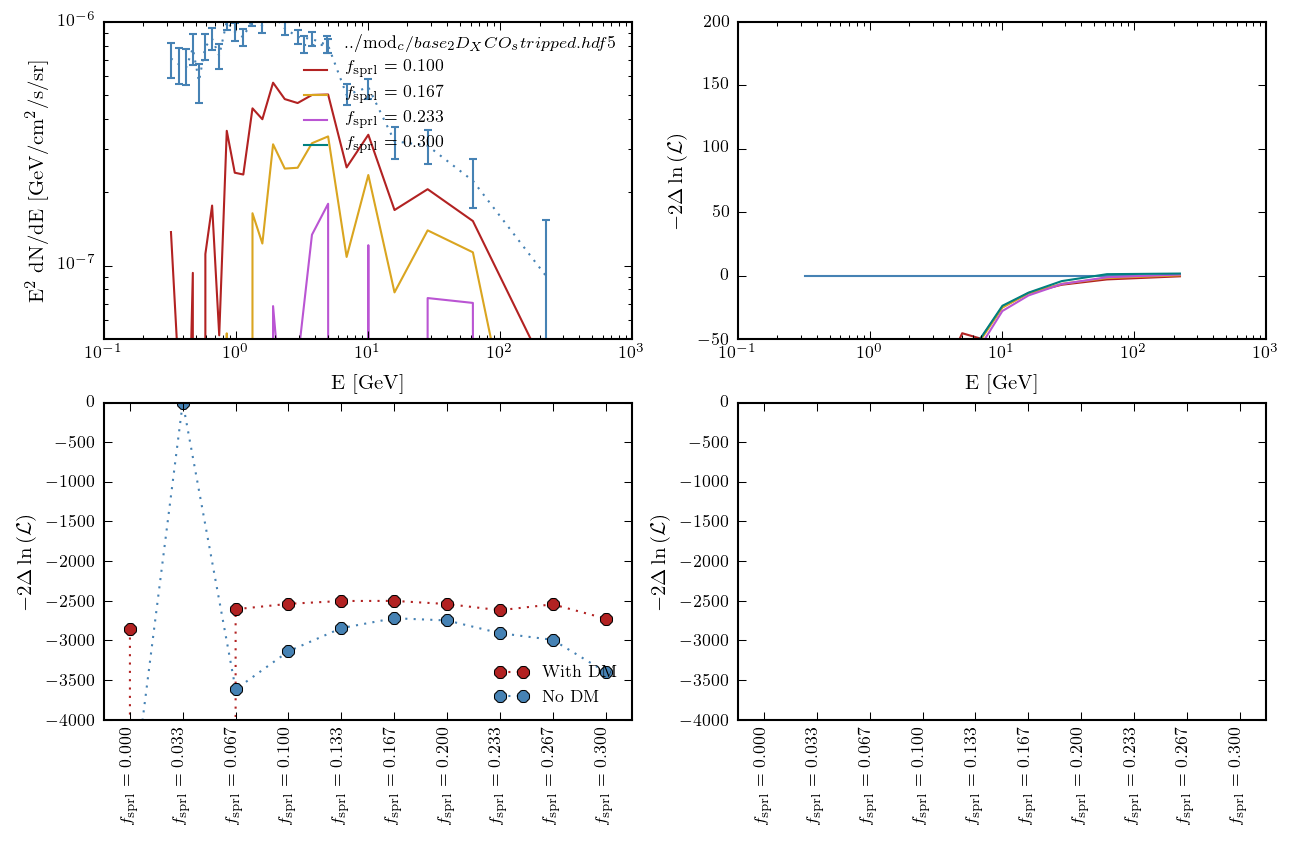

In [117]:
PlotSeries(start=0, stop=10, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,10)], mod=2,ylim=(-4000,0) )

log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_e_10_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_11_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_12_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_13_XCO_stripped.hdf5 -1186297.28589 -2254.9121349
log-like, TS: mod_e_14_XCO_stripped.hdf5 -1186200.5512 -2448.38152106
log-like, TS: mod_e_15_XCO_stripped.hdf5 -1185960.61332 -2928.25728191
log-like, TS: mod_e_16_XCO_stripped.hdf5 -1185720.04597 -3409.39199326
log-like, TS: mod_e_17_XCO_stripped.hdf5 -1185668.59734 -3512.28923986
log-like, TS: mod_e_18_XCO_stripped.hdf5 -1184375.84522 -6097.79347671
log-like, TS: mod_e_19_XCO_stripped.hdf5 -1183659.79801 -7529.88790625
log-like, TS: mod_e_20_XCO_stripped.hdf5 -1182918.66272 -9012.15847918


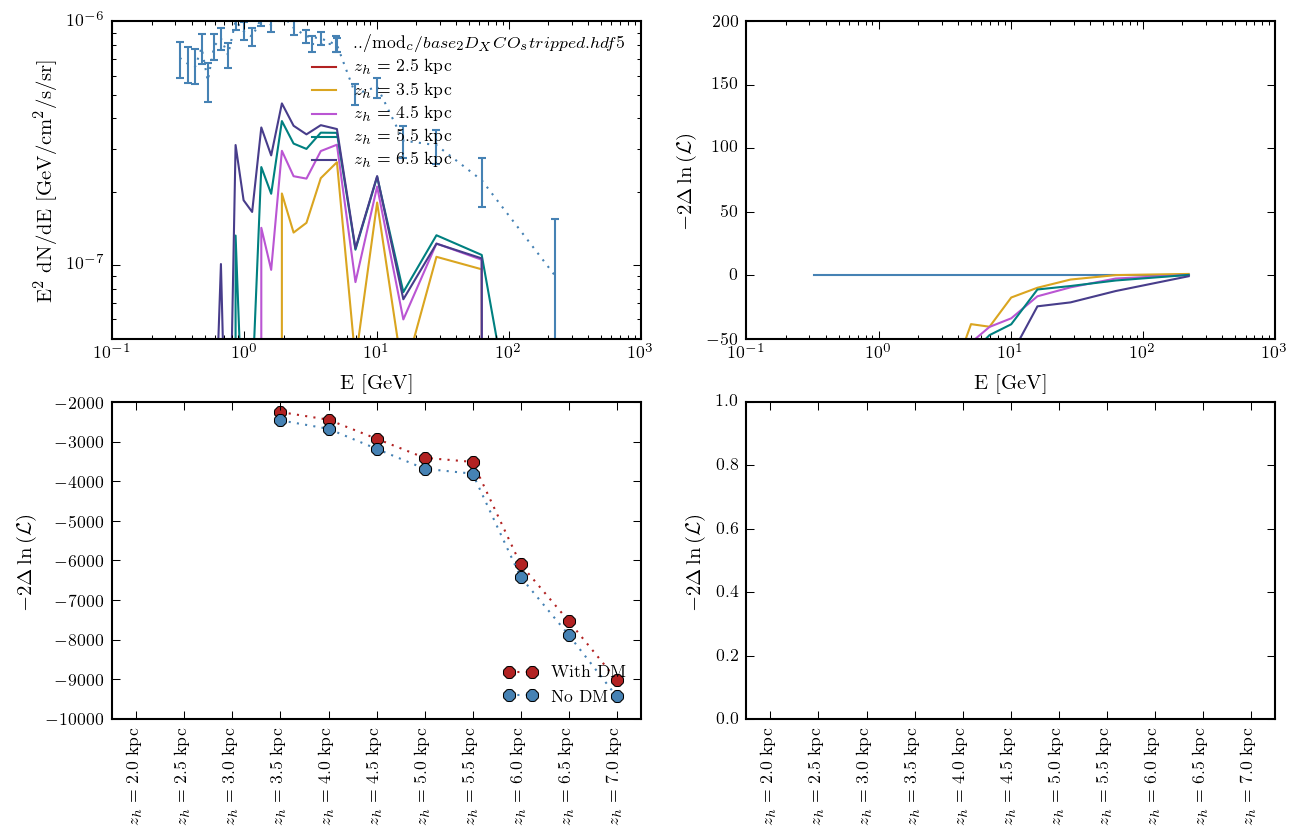

In [118]:
PlotSeries(start=10, stop=21, text='Halo Height', labels=[r'$z_h='+str(i)+'$ kpc' for i in np.linspace(2,7,11)], mod=2)

log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_e_21_XCO_stripped.hdf5 -1185189.11226 -4471.25939946
log-like, TS: mod_e_22_XCO_stripped.hdf5 -1186297.28589 -2254.9121349
log-like, TS: mod_e_23_XCO_stripped.hdf5 -1186315.62385 -2218.2362147
log-like, TS: mod_e_24_XCO_stripped.hdf5 -1185750.7963 -3347.89132236


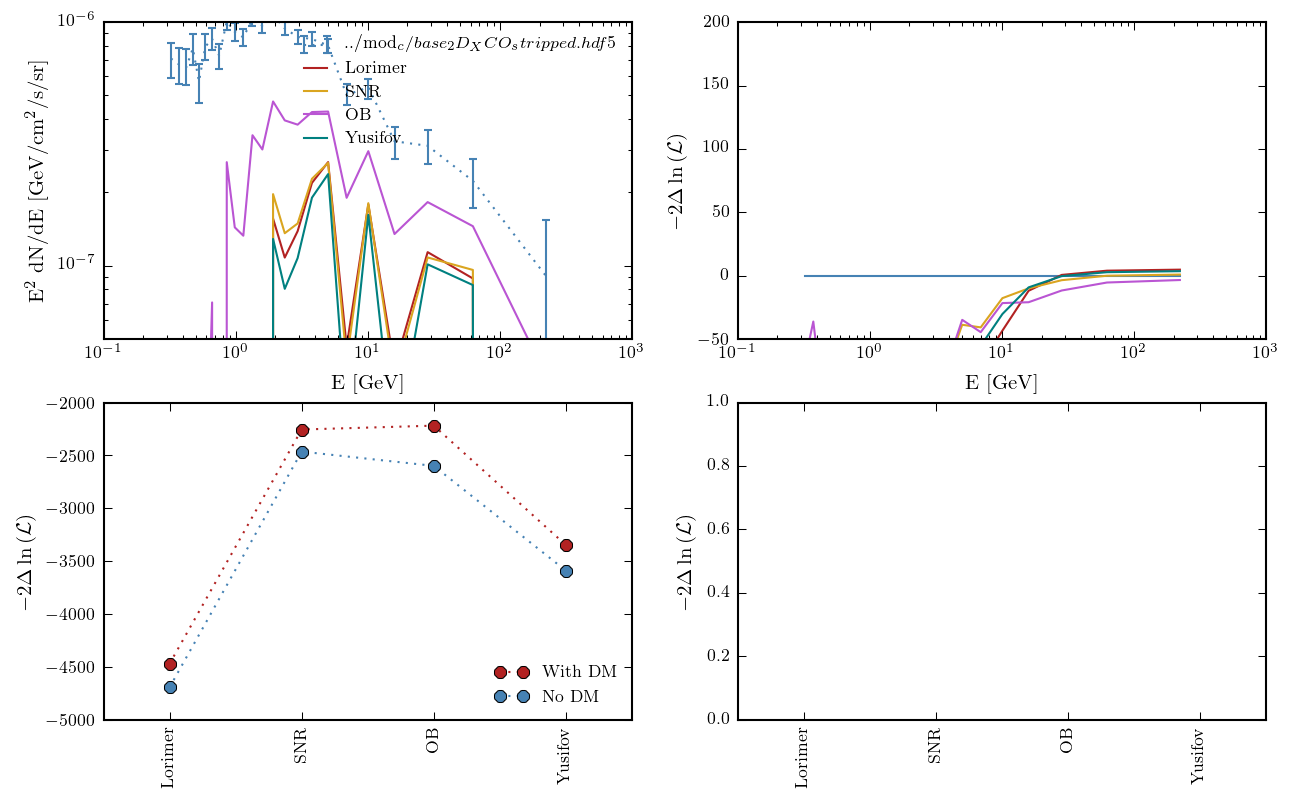

In [119]:
PlotSeries(start=21, stop=25, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'))

log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_e_25_XCO_stripped.hdf5 -1185745.99972 -3357.48448998
log-like, TS: mod_e_26_XCO_stripped.hdf5 -1184949.36592 -4950.75208642
log-like, TS: mod_e_27_XCO_stripped.hdf5 -1186297.28589 -2254.9121349
log-like, TS: mod_e_28_XCO_stripped.hdf5 -1185481.71882 -3886.04628231


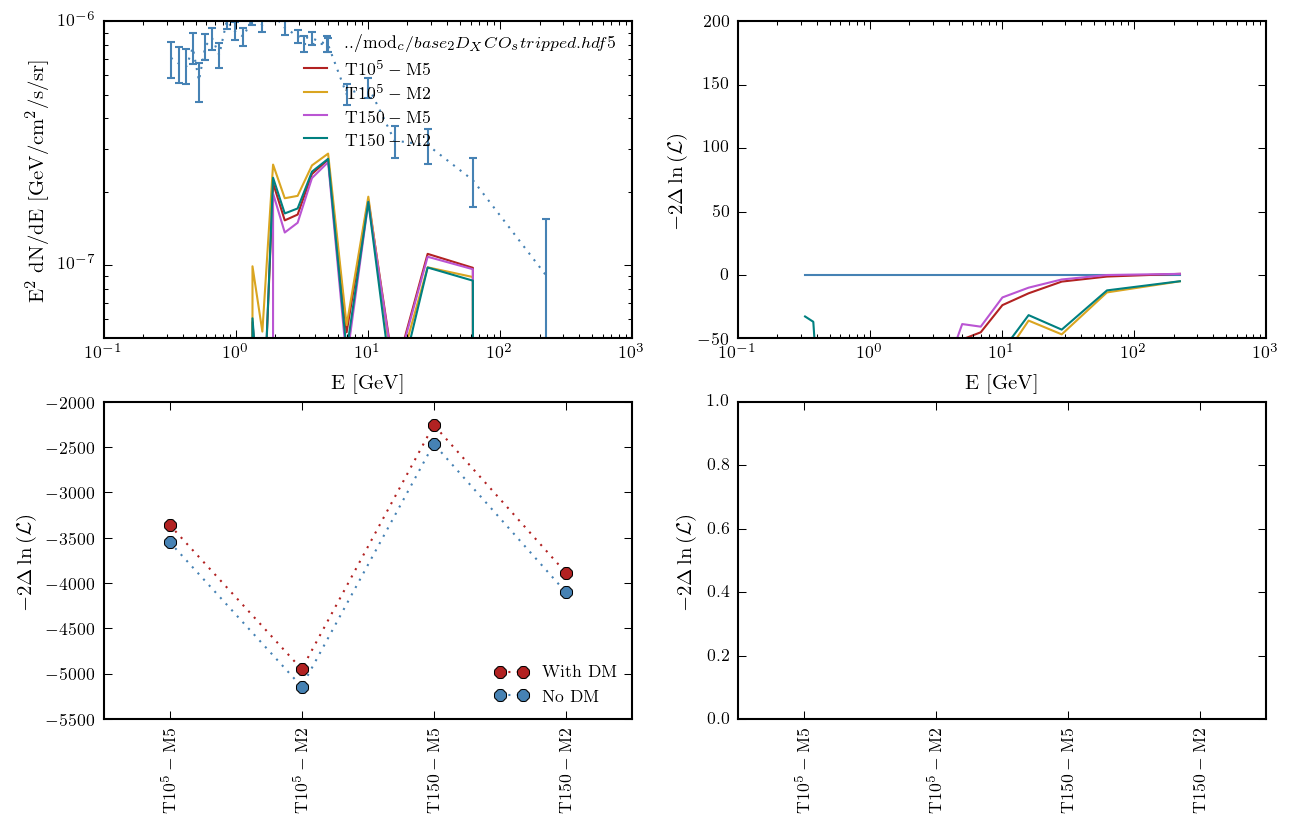

In [120]:
PlotSeries(start=25, stop=29, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'))

log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_e_29_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_30_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_31_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_32_XCO_stripped.hdf5 -1185645.30107 -3558.88177937
log-like, TS: mod_e_33_XCO_stripped.hdf5 -1186297.3391 -2254.80573367
log-like, TS: mod_e_34_XCO_stripped.hdf5 -1186243.99011 -2361.50369636
log-like, TS: mod_e_35_XCO_stripped.hdf5 -1186206.3889 -2436.70612431
log-like, TS: mod_e_36_XCO_stripped.hdf5 -1186172.9627 -2503.55852669


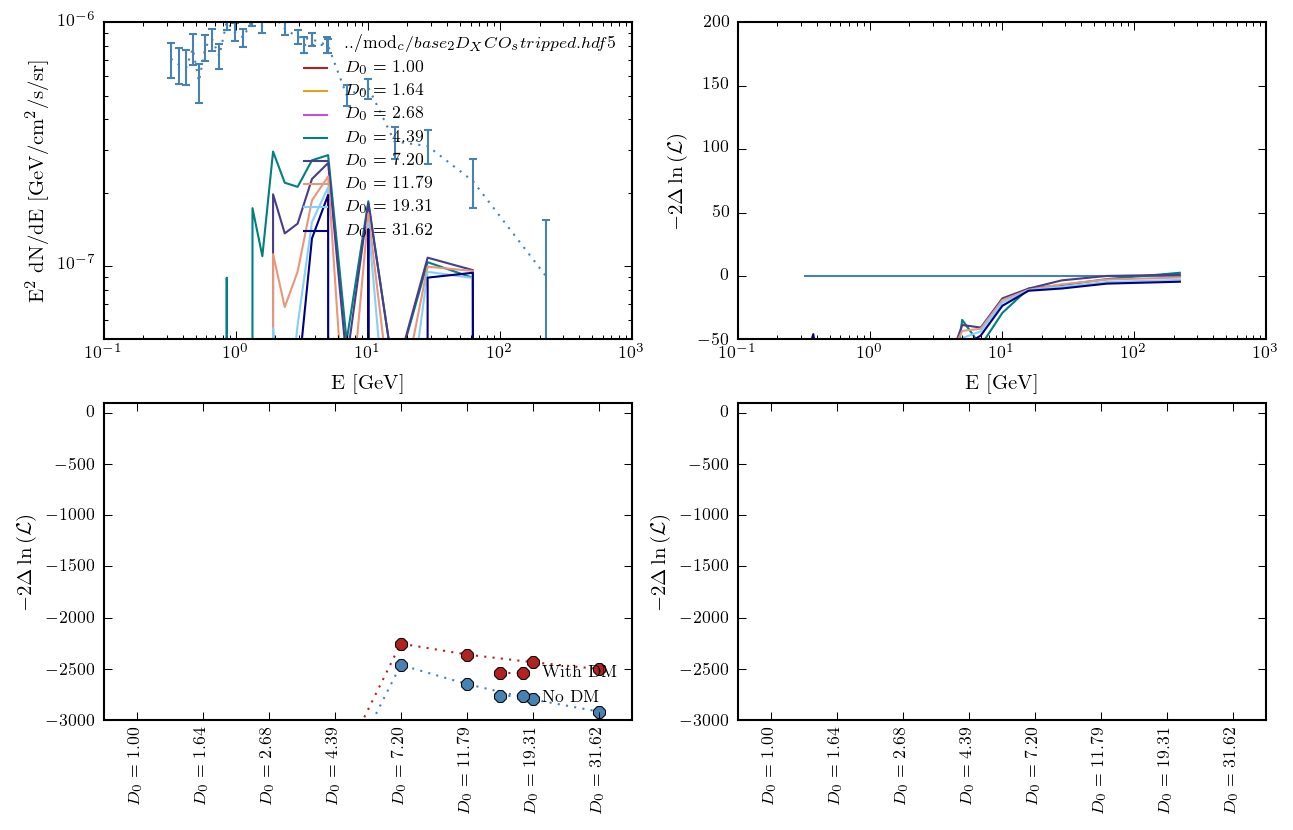

In [121]:
PlotSeries(start=29, stop=37, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28],ylim=(-3000,100))

log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_e_37_XCO_stripped.hdf5 -1186253.41842 -2342.64707926
log-like, TS: mod_e_38_XCO_stripped.hdf5 -1186309.8524 -2229.77912886
log-like, TS: mod_e_39_XCO_stripped.hdf5 -1185701.04354 -3447.39683616
log-like, TS: mod_e_40_XCO_stripped.hdf5 no results found for model  mod_e_40_XCO_stripped.hdf5
log-like, TS: mod_e_41_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_42_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_43_XCO_stripped.hdf5 nan nan
log-like, TS: mod_e_44_XCO_stripped.hdf5 nan nan


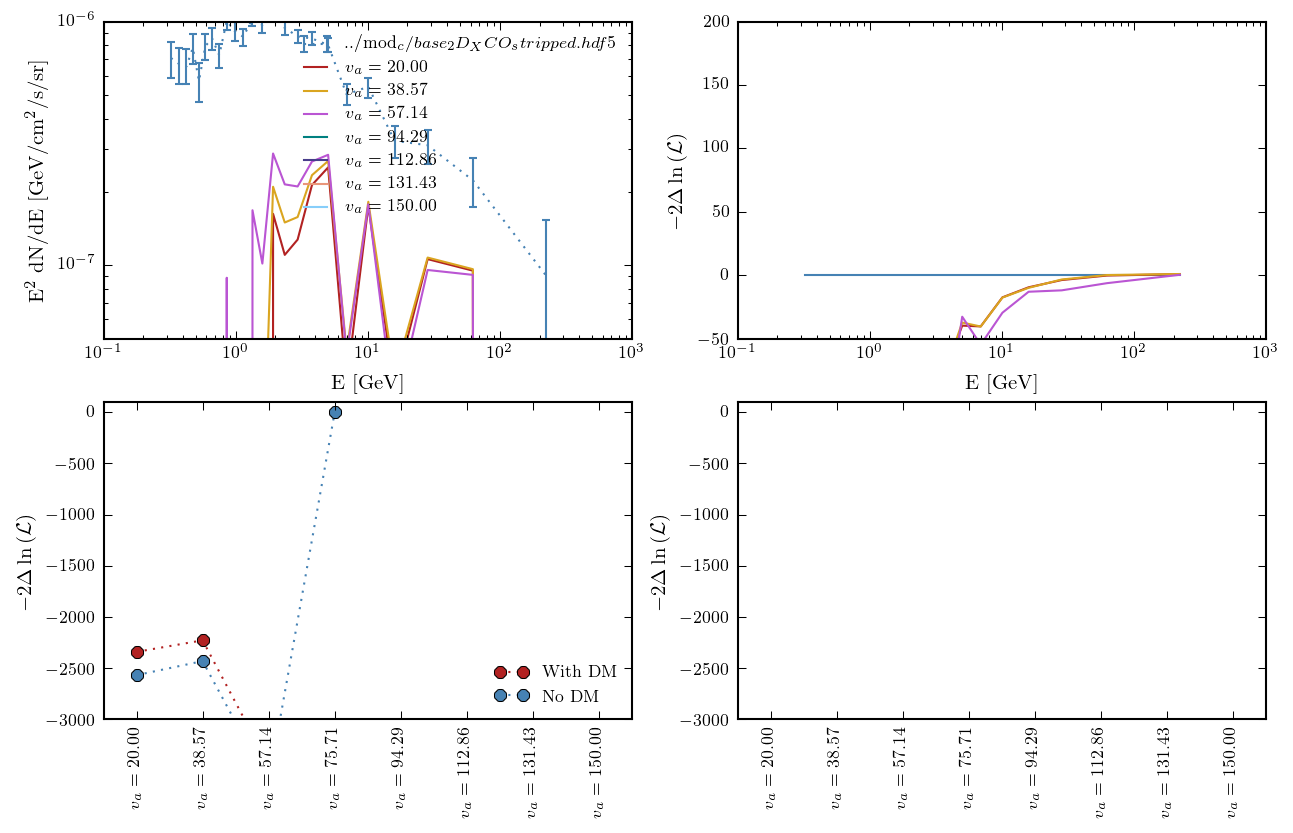

In [122]:
PlotSeries(start=37, stop=45, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-3000,100))

In [123]:
#PlotSeries(start=33, stop=39, text=r'\noindent Convection $dv/dz$\newline $\rm [km\ s^{-1}\ kpc^{-1}]$', labels=['$dvdz=%2.2f' % v + '$' for v in np.linspace(0,500,6)])

log-like, TS: center_high_res_no_dm -1186161.14316 672.062631591
log-like, TS: center_high_res -1186693.36627 -1462.75138046
log-like, TS: ../mod_c/base_2D_XCO_stripped.hdf5 -1187424.74196 0.0
log-like, TS: mod_e_45_XCO_stripped.hdf5 -1186142.15702 -2565.1698852
log-like, TS: mod_e_46_XCO_stripped.hdf5 -1186178.98935 -2491.50521552
log-like, TS: mod_e_47_XCO_stripped.hdf5 -1186237.91496 -2373.65400082
log-like, TS: mod_e_48_XCO_stripped.hdf5 -1186282.35764 -2284.76864138
log-like, TS: mod_e_49_XCO_stripped.hdf5 -1186304.4781 -2240.52773098
log-like, TS: mod_e_50_XCO_stripped.hdf5 -1186313.68032 -2222.12328086
log-like, TS: mod_e_51_XCO_stripped.hdf5 -1186318.27289 -2212.9381389
log-like, TS: mod_e_52_XCO_stripped.hdf5 -1186323.26981 -2202.94430057
log-like, TS: mod_e_53_XCO_stripped.hdf5 -1186325.82147 -2197.8409763
log-like, TS: mod_e_54_XCO_stripped.hdf5 -1186328.97694 -2191.53004712
log-like, TS: mod_e_55_XCO_stripped.hdf5 -1186329.85487 -2189.7741799


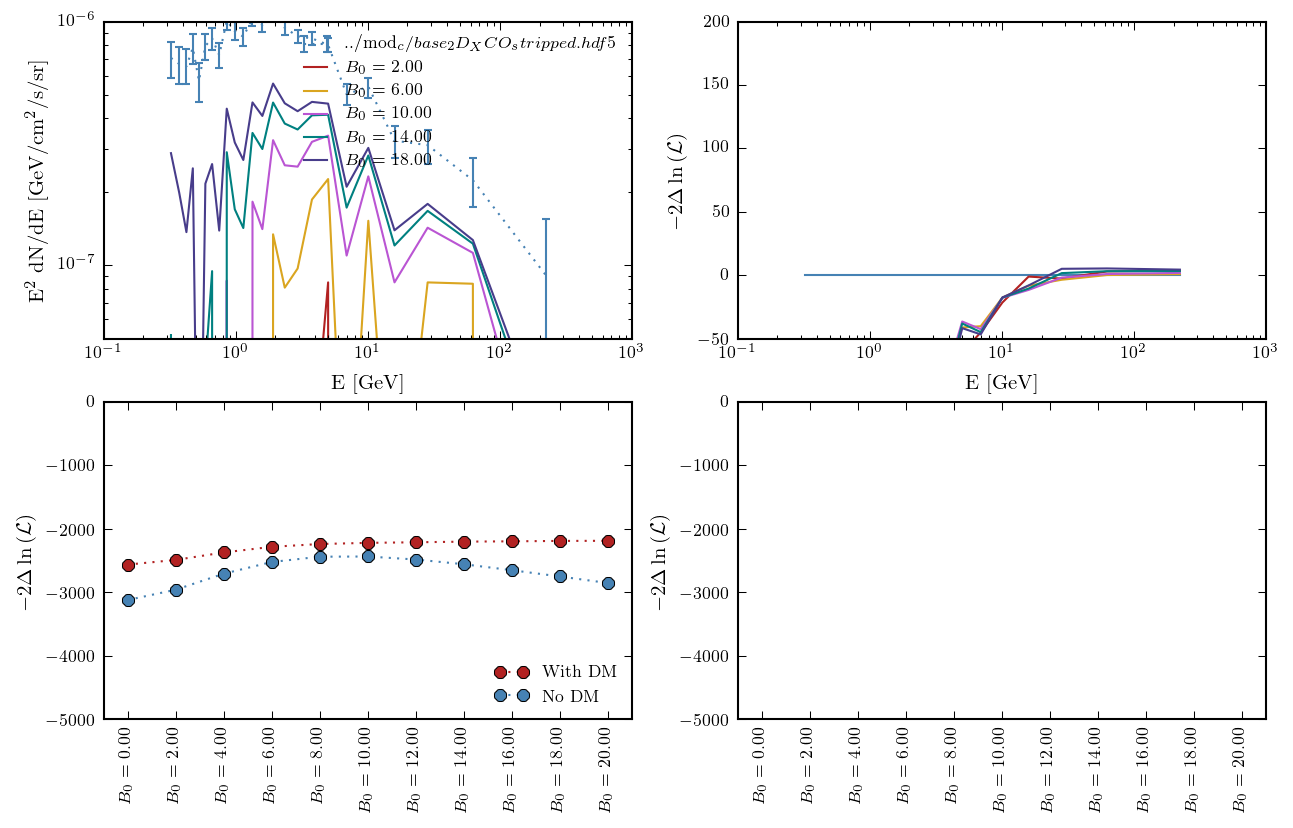

In [124]:
PlotSeries(start=45, stop=56, text=r'\noindent Magnetic Field $B_0\ \rm{[\mu G]}$', labels=['$B_0=%2.2f' % v + '$' for v in np.linspace(0,20,11)], ylim=(-5000,0), mod=2)

In [125]:
#PlotSeries(start=47, stop=53, text=r'\noindent Magnetic Field $r_B$ $\rm [kpc]$', labels=['$r_b=%2.2f' % v + '$' for v in np.linspace(5,10,6)])

In [126]:
#PlotSeries(start=53, stop=59, text=r'\noindent Magnetic Field $z_B$ $\rm [kpc]$', labels=['$z_b=%2.2f' % v + '$' for v in np.linspace(1,4,6)])

In [127]:
#PlotSeries(start=69, stop=80, text=r'\noindent Source Spiral Fraction$', labels=[r'$f_{\rm sprl}=%2.2f' % v + '$' for v in np.linspace(0,.15,16)])

In [128]:
#PlotSeries(start=65, stop=73, text=r'\noindent ISRF OPT+FIR', labels=[r'$\rm isrf_{opt,fir}=%2.2f' % v + '$' for v in np.linspace(.5,3,8)])